In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("AMZN.csv")

In [3]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2012-08-01 00:00:00+00:00,232.09,234.38,230.7001,234.14,2543800,11.6045,11.7190,11.535005,11.7070,50876000,0.0,1.0
1,1,2012-08-02 00:00:00+00:00,230.81,234.34,228.6600,230.56,3048100,11.5405,11.7170,11.433000,11.5280,60962000,0.0,1.0
2,2,2012-08-03 00:00:00+00:00,234.97,236.49,233.0300,234.03,2825300,11.7485,11.8245,11.651500,11.7015,56506000,0.0,1.0
3,3,2012-08-06 00:00:00+00:00,233.99,235.74,233.8100,235.56,1843700,11.6995,11.7870,11.690500,11.7780,36874000,0.0,1.0
4,4,2012-08-07 00:00:00+00:00,236.56,238.00,233.2500,234.13,2058300,11.8280,11.9000,11.662500,11.7065,41166000,0.0,1.0


In [4]:
df.drop(columns=df.columns[0], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377 entries, 0 to 2376
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2377 non-null   object 
 1   close        2377 non-null   float64
 2   high         2377 non-null   float64
 3   low          2377 non-null   float64
 4   open         2377 non-null   float64
 5   volume       2377 non-null   int64  
 6   adjClose     2377 non-null   float64
 7   adjHigh      2377 non-null   float64
 8   adjLow       2377 non-null   float64
 9   adjOpen      2377 non-null   float64
 10  adjVolume    2377 non-null   int64  
 11  divCash      2377 non-null   float64
 12  splitFactor  2377 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 241.5+ KB


In [6]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,2377.000000,2377.000000,2377.000000,2377.000000,2.377000e+03,2377.000000,2377.000000,2377.000000,2377.000000,2.377000e+03,2377.0,2377.0
mean,1315.862011,1329.857621,1301.217905,1316.346964,3.988040e+06,65.793101,66.492881,65.060895,65.817348,7.976081e+07,0.0,1.0
std,1054.886571,1067.197754,1042.923879,1055.733944,2.121603e+06,52.744329,53.359888,52.146194,52.786697,4.243207e+07,0.0,0.0
min,220.599000,225.160000,218.180000,221.310000,8.813370e+05,11.029950,11.258000,10.909000,11.065500,1.762674e+07,0.0,1.0
25%,373.230000,375.990000,369.360000,372.690000,2.659493e+06,18.661500,18.799500,18.468000,18.634500,5.318986e+07,0.0,1.0
50%,907.620000,915.749000,903.820000,910.300000,3.419000e+06,45.381000,45.787450,45.191000,45.515000,6.838000e+07,0.0,1.0
75%,1864.820000,1885.590000,1848.000000,1864.500000,4.631884e+06,93.241000,94.279500,92.400000,93.225000,9.263768e+07,0.0,1.0
max,3731.410000,3773.078200,3696.792900,3744.000000,2.385606e+07,186.570500,188.653910,184.839645,187.200000,4.771212e+08,0.0,1.0


In [11]:
df.Date= pd.to_datetime(df.date)
df2 =df.set_index('date')

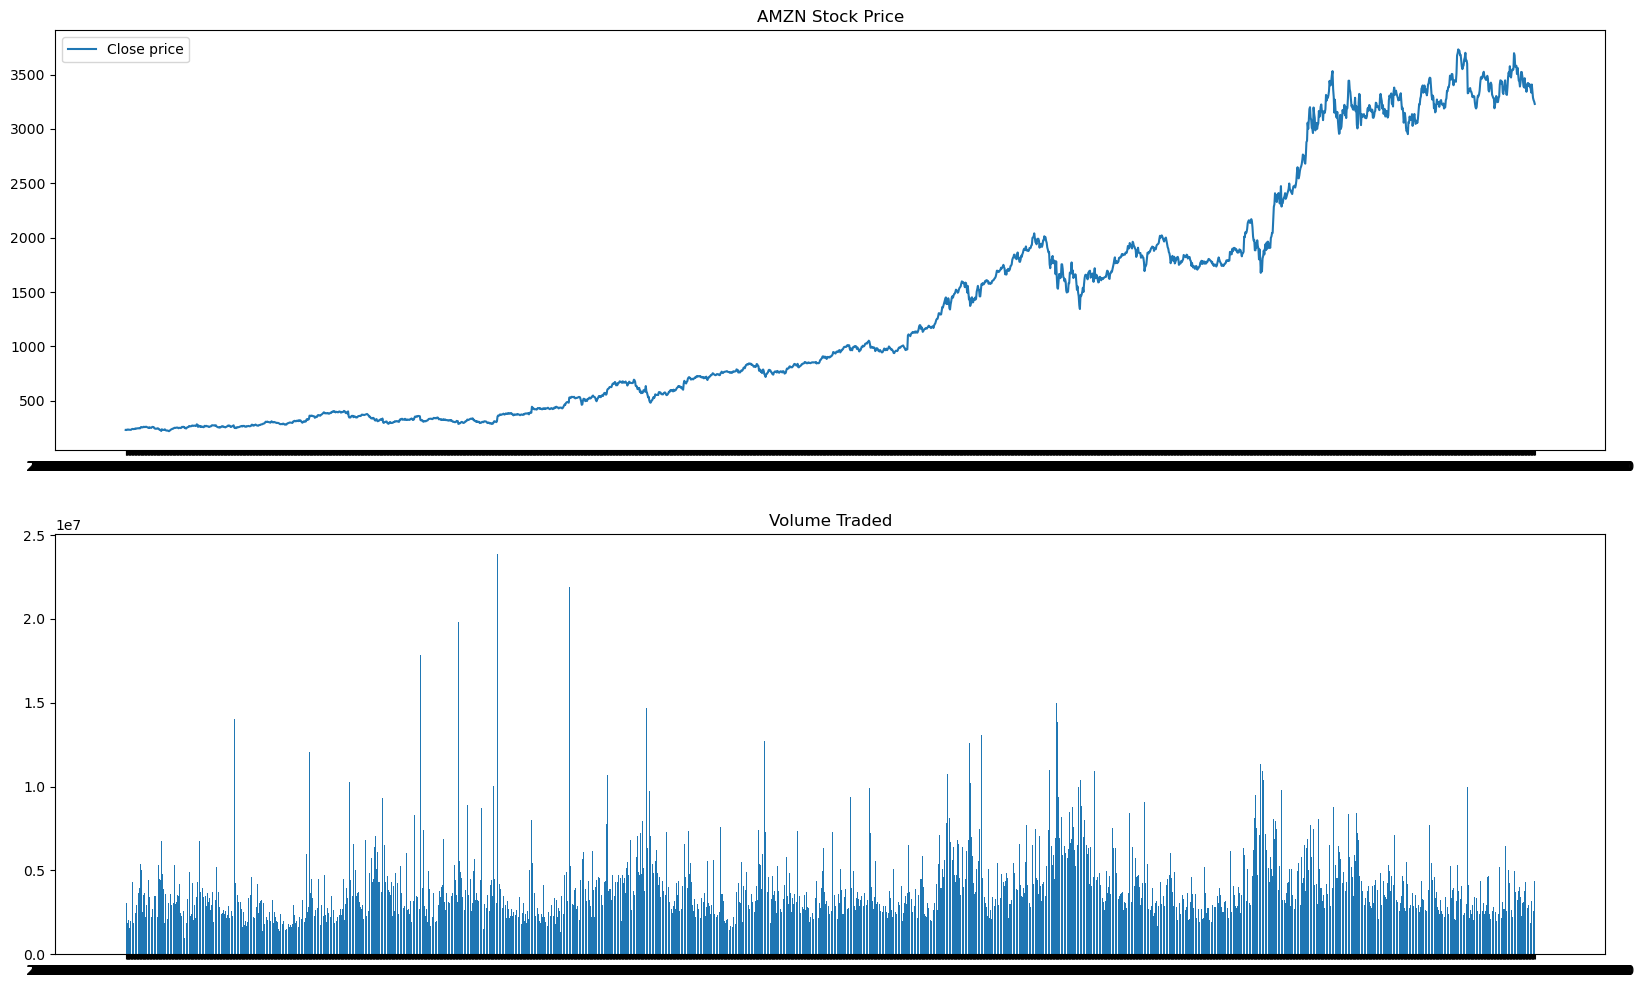

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('AMZN Stock Price')
plt.plot(df2.close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['volume'])
plt.show()


# ARIMA Model:-


In [15]:
data = list(df2["close"])

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  0.7209914395412064
2. P-Value :  0.9902476131582595
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression: 2349
5. Critical Values :
	 1% :  -3.4331369137570684
	 5% :  -2.8627712089083226
	 10% :  -2.5674254260655647


In [17]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 660.6 kB/s eta 0:00:01
   ------- -------------------------------- 112.6/614.7 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.9 MB/s eta 0:00:01
   ------------------------------------ --- 563.2/614.7 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB 7.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.8 MB 8.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.8 MB 9.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.6/2.8 MB 9.3 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.8 MB 8.9 MB/s eta 0:00:01
   -----

In [18]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [19]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [20]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

2277 100


In [21]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23080.135, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23083.197, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23083.219, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23083.197, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23085.099, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23084.725, Time=0.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23080.533, Time=1.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23076.730, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23074.803, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23073.149, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23085.151, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23074.906, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23076.879, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=23076.011, Time=0.08 sec

Best model:  ARIMA

In [23]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(3,1,0))

In [24]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2377
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -11534.005
Date:                Fri, 19 Apr 2024   AIC                          23076.011
Time:                        09:17:38   BIC                          23099.104
Sample:                             0   HQIC                         23084.416
                               - 2377                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0275      0.011     -2.474      0.013      -0.049      -0.006
ar.L2         -0.0057      0.011     -0.511      0.610      -0.027       0.016
ar.L3         -0.0747      0.010     -7.546      0.000      -0.094      -0.055
sigma2       964.9979     11.222     85.988      0.000     943.002     986.993
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11002.48
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              53.39   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([3202.28857561, 3192.61119446, 3202.73372386, 3264.9931744 ,
       3303.39765896, 3294.21172044, 3312.59314427, 3349.10245518,
       3418.14366681, 3466.51658637, 3473.12182644, 3459.83382555,
       3477.11563075, 3509.5321329 , 3523.7620077 , 3482.87234868,
       3468.58589856, 3460.67266501, 3451.38630118, 3476.01573109,
       3488.28717548, 3461.23087558, 3357.88416965, 3346.48805798,
       3387.09343428, 3415.7086476 , 3422.33416659, 3403.60336883,
       3317.8326688 , 3303.50942401, 3292.27750884, 3284.5084546 ,
       3193.56374191, 3220.8023428 , 3267.6879309 , 3298.75365801,
       3285.70804081, 3244.52329598, 3248.57254196, 3286.41866966,
       3299.14539868, 3403.16773341, 3443.92096435, 3435.85369903,
       3413.05747211, 3434.81893808, 3340.34730187, 3319.85980032,
       3382.0527234 , 3392.85716811, 3440.82810559, 3372.93792749,
       3315.98421537, 3318.74291987, 3386.12729648, 3474.43827187,
       3511.98624491, 3482.62129375, 3570.86194839, 3486.39021

In [26]:
s = pd.Series(pred, index =df2.index[-100:])
s

date
2021-08-19 00:00:00+00:00    3202.288576
2021-08-20 00:00:00+00:00    3192.611194
2021-08-23 00:00:00+00:00    3202.733724
2021-08-24 00:00:00+00:00    3264.993174
2021-08-25 00:00:00+00:00    3303.397659
                                ...     
2022-01-04 00:00:00+00:00    3407.109834
2022-01-05 00:00:00+00:00    3354.489213
2022-01-06 00:00:00+00:00    3283.698745
2022-01-07 00:00:00+00:00    3270.351450
2022-01-10 00:00:00+00:00    3256.318538
Length: 100, dtype: float64

<Axes: xlabel='date'>

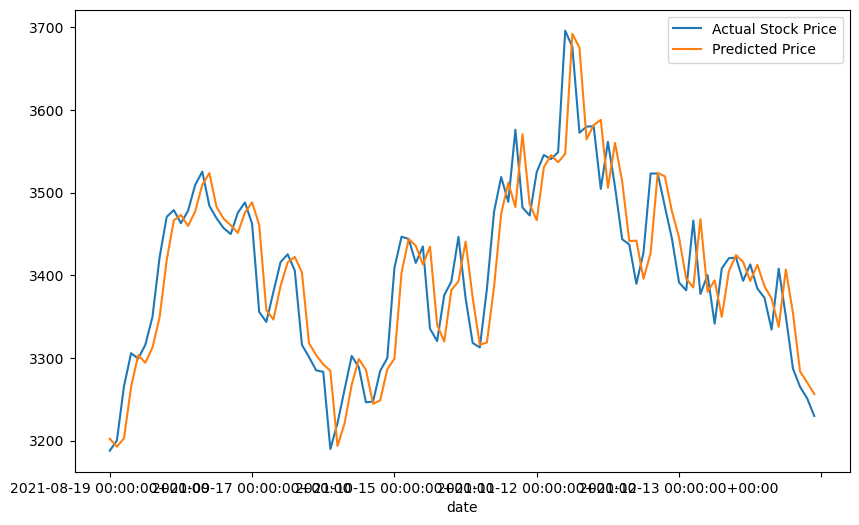

In [28]:
plt.figure(figsize=(10,6), dpi=100)
df2['close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

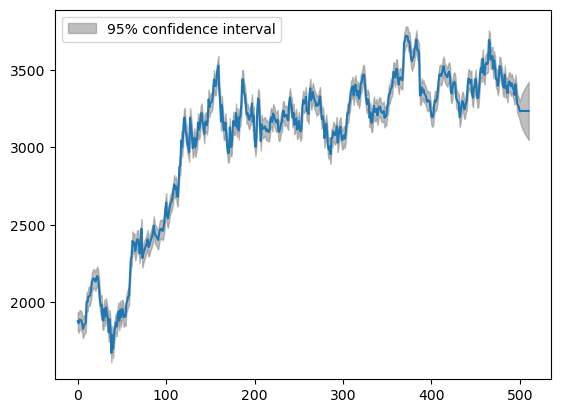

In [29]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

49.22174954261198

In [31]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.7766364321611482

# Predicting Future 10 values:

In [32]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([3256.31853755, 3232.03485807, 3233.13772955, 3234.6898951 ,
       3234.46802411, 3234.38296896, 3234.27061643, 3234.29076306,
       3234.29719753, 3234.30529935, 3234.30353505])

In [33]:
import datetime
start_date = datetime.datetime(2021,12,31)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [34]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2021-12-31    3256.318538
2022-01-01    3232.034858
2022-01-02    3233.137730
2022-01-03    3234.689895
2022-01-04    3234.468024
2022-01-05    3234.382969
2022-01-06    3234.270616
2022-01-07    3234.290763
2022-01-08    3234.297198
2022-01-09    3234.305299
2022-01-10    3234.303535
dtype: float64

Source: https://www.youtube.com/watch?v=8nH08zkJCA8